In [1]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
import csv
import math
import pandas as pd
# %pylab inline
import matplotlib.pyplot as plt

In [2]:
sift = cv2.xfeatures2d.SIFT_create()
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread('../Images/ball_big.jpg')
image = cv2.resize(image, (616, 616)) # image gets too blurry and cannot detect features
sizeX = image.shape[1]
sizeY = image.shape[0]

row_list = [["scale ratio", "volume cm3", "sensors_x", "sensors_y", "sensors_e", "coordinates_src", "coordinates_dst"]]

volume = pd.read_csv('../CSV_files/BALL/dataBall_VOLUME.csv')
volume.describe()
list_volume = volume['volume cm3'].tolist()

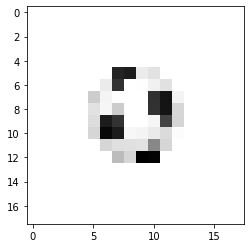

In [3]:
index = 0
for j in range(100, 2, -1):
    scaling_ratio = j / 100
    width = int(image.shape[1] * scaling_ratio)
    height = int(image.shape[0] * scaling_ratio)

    dsize = (width, height)
    rescale = cv2.resize(image, dsize)
    kp1, des1 = sift.detectAndCompute(image, None)
    kp2, des2 = sift.detectAndCompute(rescale, None)
    # create BFMatcher object
    bf = cv2.BFMatcher()

    try:
        # Match descriptors.
        matches = bf.match(des1, des2)
    except:
        plt.title("Image is too blurry!")
        break

    # Sort them in the order of their distance.
    matches = sorted(matches, key=lambda x: x.distance)

    num_matches = 1
    if len(matches) < num_matches:
        num_matches = len(matches)

    difference_listX = []
    difference_listY = []
    euclideanDistance_list = []

    coordinatesSRC = []
    coordinatesDST = []

    for m in matches:
        pt1 = kp1[m.queryIdx].pt
        pt2 = kp2[m.trainIdx].pt

        difference_listX.append(pt1[0] - pt2[0])
        difference_listY.append(pt1[1] - pt2[1])
        euclideanDistance_list.append(m.distance)
        coordinatesSRC.append(pt1[0]/sizeX)
        coordinatesSRC.append(pt1[1]/sizeY)
        coordinatesDST.append(pt2[0]/sizeX)
        coordinatesDST.append(pt2[1]/sizeY)

    volume_el = list_volume[index]
    index +=1

    row_list.append([scaling_ratio, volume_el, difference_listX, difference_listY, euclideanDistance_list, coordinatesSRC, coordinatesDST])

plt.imshow(rescale)
plt.show()

In [4]:
with open('dataBall_SIFT.csv', 'w', newline='') as myfile:
    writer = csv.writer(myfile, quoting=csv.QUOTE_NONNUMERIC, delimiter=',')
    writer.writerows(row_list)
